# Experiment Results Analysis

This notebook loads the experiment results from the JSON file, unpacks the data, and visualizes key metrics such as loss curves, forecast errors, and system resource usage. These visualizations will help compare the performance of ARIMA, Prophet, LSTM, and Transformer models for climate forecasting.

In [36]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.utils.result_utils import load_results, unpack_results

results_path = os.path.join("..", "src", "trained_models", "experiment_results.json")

results = load_results(results_path)
unpacked_results = unpack_results(results)

print("Experiment Timestamp:", unpacked_results.get("timestamp"))
print("Hyperparameters:")
print(json.dumps(unpacked_results.get("hyperparameters"), indent=4))
print("\nSystem Metrics:")
print(json.dumps(unpacked_results.get("system_metrics"), indent=4))

Experiment Timestamp: 2025-03-14 21:26:18
Hyperparameters:
{
    "ARIMA": {
        "order": [
            2,
            1,
            2
        ]
    },
    "Prophet": {},
    "CustomTransformer": {
        "input_size": 3,
        "model_dim": 32,
        "num_heads": 4,
        "num_layers": 2,
        "output_size": 3,
        "dropout": 0.1,
        "lr": 0.001,
        "num_epochs": 20
    }
}

System Metrics:
{
    "cpu": 12.5,
    "memory": 68.8
}


In [38]:
metrics_data = []
for model in ["ARIMA", "Prophet", "CustomTransformer"]:
    if model in unpacked_results:
        m = unpacked_results[model]
        metrics_data.append({
            "Model": model,
            "Training Time (s)": m.get("training_time", None),
            "MAE": m.get("MAE", None),
            "RMSE": m.get("RMSE", None),
            "MAPE": m.get("MAPE", None),
            "R2": m.get("R2", None),
            "Explained Variance": m.get("ExplainedVariance", None)
        })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

     Model  Training Time (s)       MAE     RMSE         MAPE        R2  \
0    ARIMA           0.094232  1.494386  1.72386  1323.975776 -2.571388   
1  Prophet           0.253168  0.327406  0.41288   880.173128  0.795128   

   Explained Variance  
0            0.009818  
1            0.821776  


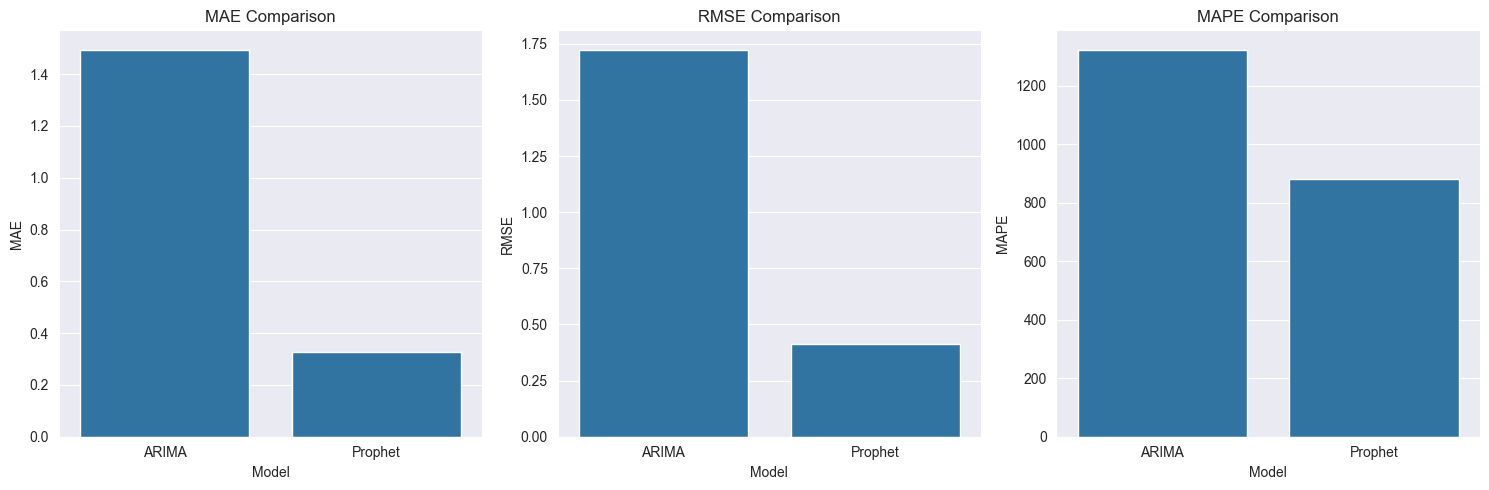

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(x="Model", y="MAE", data=metrics_df, ax=axes[0])
axes[0].set_title("MAE Comparison")

sns.barplot(x="Model", y="RMSE", data=metrics_df, ax=axes[1])
axes[1].set_title("RMSE Comparison")

sns.barplot(x="Model", y="MAPE", data=metrics_df, ax=axes[2])
axes[2].set_title("MAPE Comparison")

plt.tight_layout()
plt.show()

In [40]:
def plot_loss_curves(model_name, results_dict):
    if "train_loss" in results_dict and "val_loss" in results_dict:
        epochs = list(range(1, len(results_dict["train_loss"]) + 1))
        plt.figure(figsize=(8,5))
        plt.plot(epochs, results_dict["train_loss"], marker="o", label="Train Loss")
        plt.plot(epochs, results_dict["val_loss"], marker="s", label="Validation Loss")
        plt.title(f"{model_name} Loss Curves")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    else:
        print(f"No loss curves available for {model_name}")

for model in ["LSTM", "Transformer"]:
    if model in unpacked_results:
        plot_loss_curves(model, unpacked_results[model])

In [41]:
def plot_forecast_errors(model_name, results_dict):
    if "forecast_errors" in results_dict:
        plt.figure(figsize=(8,5))
        plt.plot(results_dict["forecast_errors"], marker="o")
        plt.title(f"{model_name} Forecast Errors")
        plt.xlabel("Time Step")
        plt.ylabel("Forecast Error")
        plt.show()
    else:
        print(f"No forecast errors available for {model_name}")
        
for model in ["ARIMA", "Prophet", "LSTM", "Transformer"]:
    if model in unpacked_results:
        plot_forecast_errors(model, unpacked_results[model])

No forecast errors available for ARIMA
No forecast errors available for Prophet


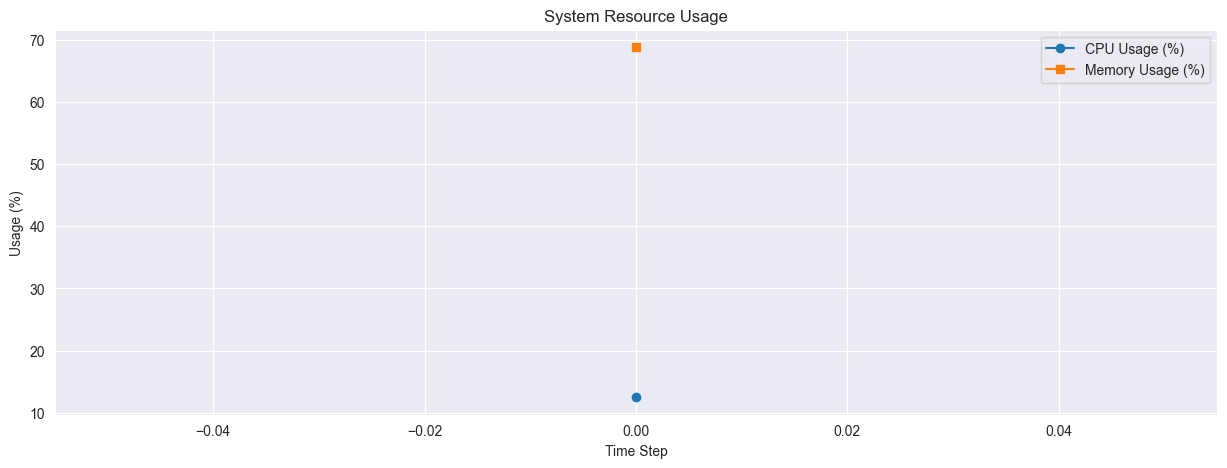

In [42]:
def plot_system_metrics(system_metrics):
    if "cpu" in system_metrics and "memory" in system_metrics:
        plt.figure(figsize=(15,5))
        plt.plot(system_metrics["cpu"], label="CPU Usage (%)", marker="o")
        plt.plot(system_metrics["memory"], label="Memory Usage (%)", marker="s")
        plt.title("System Resource Usage")
        plt.xlabel("Time Step")
        plt.ylabel("Usage (%)")
        plt.legend()
        plt.show()
    else:
        print("No system metrics available")

plot_system_metrics(unpacked_results["system_metrics"])